<a href="https://colab.research.google.com/github/TonpaZoldyck/FlightDelaysAnalysis/blob/main/Airlines_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Data loading and imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('seaborn')

# Define the starting color (light orange)
start_color = "#FFA726"  # You can use other color representations as well

# Define the ending color (blue)
end_color = "#1976D2"

# Create a custom color palette
custom_palette = sns.light_palette(start_color, input="hex", reverse=True, as_cmap=False) + sns.dark_palette(end_color, input="hex", reverse=True, as_cmap=False)

# Set the custom color palette
sns.set_palette(custom_palette)

# Your Seaborn plots here
# ...


<ipython-input-5-de0de5da33b9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Notes to Self

Cancelled flights - can make a data frame of cancelled flights - visualise and analyse this seperrately

On-time Performance(OTP): This is a powerful KPI that airlines use to track their punctuality and reliability. It is a measure of the percentage of flights that depart or arrive within 15 minutes of their scheduled time.



Potential Questions to Explore

1. **On-Time Performance:**
   - What is the overall on-time performance of different airlines over the years?
   - Are there specific routes or airports where certain airlines tend to have better on-time performance?

2. **Flight Delays:**
   - What are the main factors contributing to flight delays (e.g., weather, carrier, national air system)?
   - How do delays vary by time of day, day of the week, or month?

3. **Cancellation Analysis:**
   - What are the most common reasons for flight cancellations, and how do they vary by airline and airport?
   - Is there a correlation between flight cancellations and adverse weather conditions?

4. **Route Popularity:**
   - Which are the most popular flight routes based on the number of flights and passengers?
   - Are there seasonal variations in route popularity?

5. **Aircraft Utilization:**
   - How efficiently are aircraft utilized in terms of turnaround time at airports?
   - Are there trends in taxi-out and taxi-in times for different airlines?

6. **Geographical Analysis:**
   - How do flight patterns vary by region or state?
   - Are there specific routes that consistently experience more delays due to geography?

7. **Diverted Flights:**
   - What are the reasons for flight diversions, and how often do they occur?
   - How do diverted flights impact overall airline operations?

8. **Correlation Analysis:**
   - Is there a correlation between the distance of a flight and the likelihood of delays or cancellations?
   - Are there correlations between specific types of delays, like carrier delays and weather delays?

9. **Airlines' Historical Performance:**
   - How has the performance of different airlines changed over time?
   - Have any airlines consistently improved their on-time performance or reduced cancellations?

10. **Passenger Load Analysis:**
    - How does the passenger load (number of passengers on a flight) relate to delays or cancellations?
    - Are there patterns in passenger load that airlines can use to optimize schedules?

11. **Security and Safety:**
    - Are there trends in security-related delays or incidents over time?
    - How do security-related incidents affect flight operations and passenger satisfaction?

12. **Economic and Seasonal Analysis:**
    - How do economic factors, such as fuel prices, impact the performance of airlines?
    - Are there seasonal trends in flight delays and cancellations?

These questions should provide you with a good starting point for exploring the dataset and gaining interesting insights. You can use data analysis and visualization techniques to answer these questions and uncover valuable information for your presentation.

In [ ]:
df = pd.read_csv('flights.csv')
cancel_df = pd.read_csv('cancellation_codes.csv')

<ipython-input-6-dc3dc90bcbbf>:1: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


In [ ]:
df.head()
len(df)

689232

In [ ]:
cancel_df.head()

,Code,Description
0,A,Carrier
1,B,Weather
2,C,National Air System
3,D,Security


# 2 Data Preparation and checks

**Column Names:**
- year
- quarter
- month
- dayofmonth
- dayofweek
- flightdate
- reporting_airline
- dot_id_reporting_airline
- iata_code_reporting_airline
- tail_number
- flight_number_reporting_airline
- originairportid
- originairportseqid
- origincitymarketid
- origin
- origincityname
- originstate
- originstatefips
- originstatename
- originwac
- destairportid
- destairportseqid
- destcitymarketid
- dest
- destcityname
- deststate
- deststatefips
- deststatename
- destwac
- crsdeptime
- deptime
- depdelay
- depdelayminutes
- depdel15
- departuredelaygroups
- deptimeblk
- taxiout
- wheelsoff
- wheelson
- taxiin
- crsarrtime
- arrtime
- arrdelay
- arrdelayminutes
- arrdel15
- arrivaldelaygroups
- arrtimeblk
- cancelled
- cancellationcode
- diverted
- crselapsedtime
- actualelapsedtime
- airtime
- flights
- distance
- distancegroup
- carrierdelay
- weatherdelay
- nasdelay
- securitydelay
- lateaircraftdelay
- firstdeptime
- totaladdgtime
- longestaddgtime
- divairportlandings
- divreacheddest
- divactualelapsedtime
- divarrdelay
- divdistance
- div1airport
- div1airportid
- div1airportseqid
- div1wheelson
- div1totalgtime
- div1longestgtime
- div1wheelsoff
- div1tailnum
- div2airport
- div2airportid
- div2airportseqid
- div2wheelson
- div2totalgtime
- div2longestgtime
- div2wheelsoff
- div2tailnum
- div3airport
- div3airportid
- div3airportseqid
- div3wheelson
- div3totalgtime
- div3longestgtime
- div3wheelsoff
- div3tailnum
- div4airport
- div4airportid
- div4airportseqid
- div4wheelson
- div4totalgtime
- div4longestgtime
- div4wheelsoff
- div4tailnum
- div5airport
- div5airportid
- div5airportseqid
- div5wheelson
- div5totalgtime
- div5longestgtime
- div5wheelsoff
- div5tailnum
- empty_col

In [ ]:
column_names = df.columns.tolist()
print(column_names)


['year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'flightdate', 'reporting_airline', 'dot_id_reporting_airline', 'iata_code_reporting_airline', 'tail_number', 'flight_number_reporting_airline', 'originairportid', 'originairportseqid', 'origincitymarketid', 'origin', 'origincityname', 'originstate', 'originstatefips', 'originstatename', 'originwac', 'destairportid', 'destairportseqid', 'destcitymarketid', 'dest', 'destcityname', 'deststate', 'deststatefips', 'deststatename', 'destwac', 'crsdeptime', 'deptime', 'depdelay', 'depdelayminutes', 'depdel15', 'departuredelaygroups', 'deptimeblk', 'taxiout', 'wheelsoff', 'wheelson', 'taxiin', 'crsarrtime', 'arrtime', 'arrdelay', 'arrdelayminutes', 'arrdel15', 'arrivaldelaygroups', 'arrtimeblk', 'cancelled', 'cancellationcode', 'diverted', 'crselapsedtime', 'actualelapsedtime', 'airtime', 'flights', 'distance', 'distancegroup', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay', 'firstdeptime', 'totaladdgtime'

In [ ]:
len(df)

689232

## 2.1 Check and understanding missing values

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values == len(df) ]
print(missing_values)


div3airport         689232
div3airportid       689232
div3airportseqid    689232
div3wheelson        689232
div3totalgtime      689232
div3longestgtime    689232
div3wheelsoff       689232
div3tailnum         689232
div4airport         689232
div4airportid       689232
div4airportseqid    689232
div4wheelson        689232
div4totalgtime      689232
div4longestgtime    689232
div4wheelsoff       689232
div4tailnum         689232
div5airport         689232
div5airportid       689232
div5airportseqid    689232
div5wheelson        689232
div5totalgtime      689232
div5longestgtime    689232
div5wheelsoff       689232
div5tailnum         689232
empty_col           689232
dtype: int64


In [ ]:
missing_values.index.to_list()

['div3airport',
 'div3airportid',
 'div3airportseqid',
 'div3wheelson',
 'div3totalgtime',
 'div3longestgtime',
 'div3wheelsoff',
 'div3tailnum',
 'div4airport',
 'div4airportid',
 'div4airportseqid',
 'div4wheelson',
 'div4totalgtime',
 'div4longestgtime',
 'div4wheelsoff',
 'div4tailnum',
 'div5airport',
 'div5airportid',
 'div5airportseqid',
 'div5wheelson',
 'div5totalgtime',
 'div5longestgtime',
 'div5wheelsoff',
 'div5tailnum',
 'empty_col']

In [ ]:
# Drop empty columns (all NaN or null values)
df_cleaned = df.dropna(axis=1, how='all')




In [ ]:
missing_values = df_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

tail_number               2938
deptime                  13539
depdelay                 13551
depdelayminutes          13551
depdel15                 13551
departuredelaygroups     13551
taxiout                  13713
wheelsoff                13713
wheelson                 14172
taxiin                   14172
arrtime                  14172
arrdelay                 15374
arrdelayminutes          15374
arrdel15                 15374
arrivaldelaygroups       15374
cancelled                    1
cancellationcode        675364
diverted                     1
crselapsedtime               1
actualelapsedtime        15375
airtime                  15375
flights                      1
distance                     1
distancegroup                1
carrierdelay            550916
weatherdelay            550916
nasdelay                550916
securitydelay           550916
lateaircraftdelay       550916
firstdeptime            685637
totaladdgtime           685640
longestaddgtime         685640
divairpo

Columns with missing values are actually strong indicators or directly correlated with delays - these are not columns or information we would have before a flight takes off, or in advance thus they should not be used when predicting this feature.

Div3 to 5 look to be missing all of there values so we can just drop these. Diverted airport code 5 doesn't exist or we do not have data for it.

## 2.2 Exploring Data Types

In [ ]:
data_types = df.dtypes
print(data_types)


year                  int64
quarter               int64
month                 int64
dayofmonth            int64
dayofweek             int64
                     ...   
div5totalgtime      float64
div5longestgtime    float64
div5wheelsoff       float64
div5tailnum         float64
empty_col           float64
Length: 110, dtype: object


# 3 Exploratory Data Analysis

## 3.1 Delay Analysis

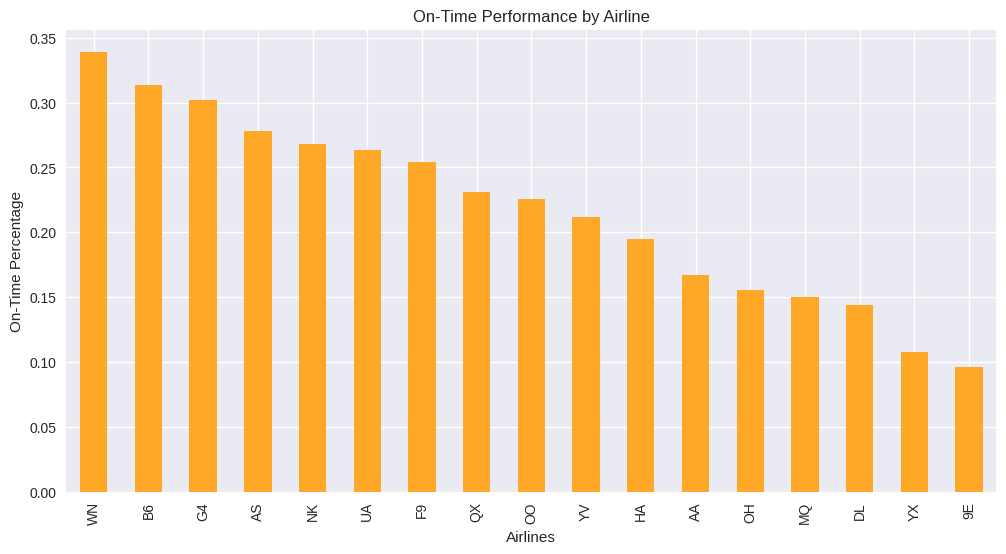

In [ ]:
# Calculate on-time performance by airline
on_time_performance = df.groupby('reporting_airline')['depdel15'].mean().sort_values(ascending=False)
on_time_performance.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Airlines')
plt.ylabel('On-Time Percentage')
plt.title('On-Time Performance by Airline')
plt.show()



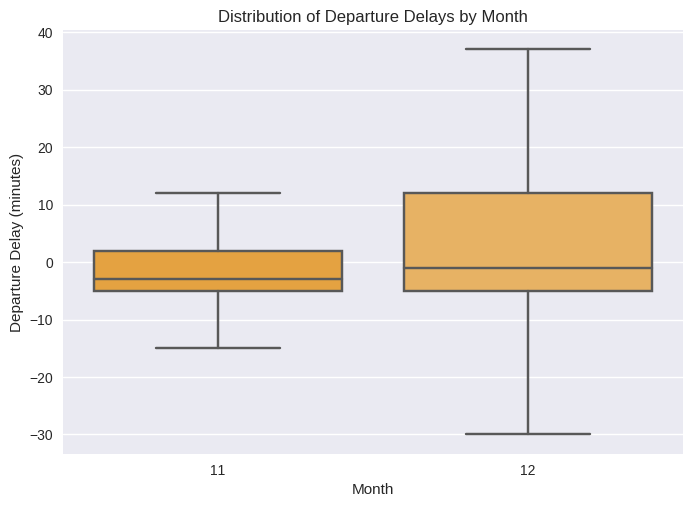

In [ ]:
# Create a boxplot of departure delays by month
sns.boxplot(x='month', y='depdelay', data=df, showfliers = False)
plt.xlabel('Month')
plt.ylabel('Departure Delay (minutes)')
plt.title('Distribution of Departure Delays by Month')
plt.show()


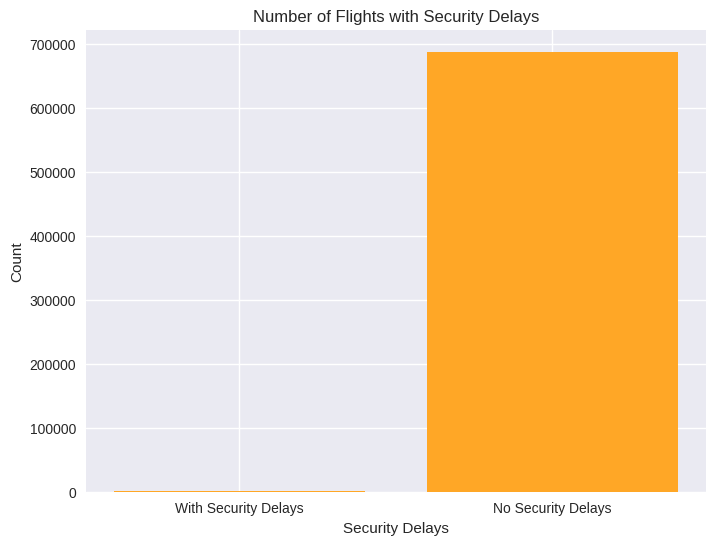

In [ ]:
import matplotlib.pyplot as plt

# Count security-related delays
security_delays = df['securitydelay'].loc[df['securitydelay'] > 0].count()
no_security_delays = len(df) - security_delays
security_delay_counts = [security_delays, no_security_delays]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['With Security Delays', 'No Security Delays'], security_delay_counts)
plt.xlabel('Security Delays')
plt.ylabel('Count')
plt.title('Number of Flights with Security Delays')
plt.show()


## 3.2 Route Analytics

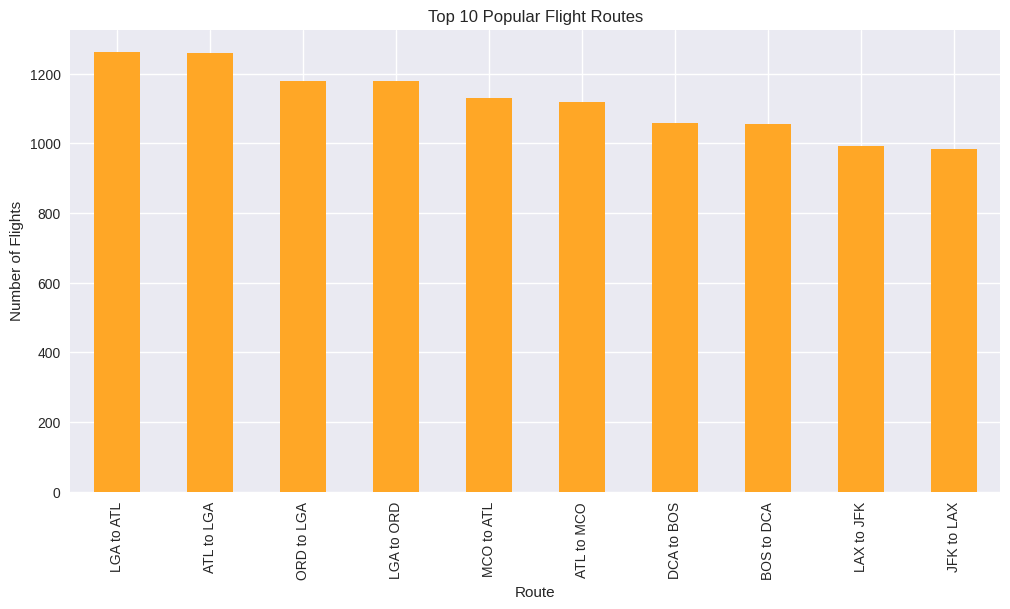

In [ ]:
# Calculate the most popular routes by number of flights
popular_routes = df['origin'] + ' to ' + df['dest']
top_routes = popular_routes.value_counts().head(10)
top_routes.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.title('Top 10 Popular Flight Routes')
plt.show()


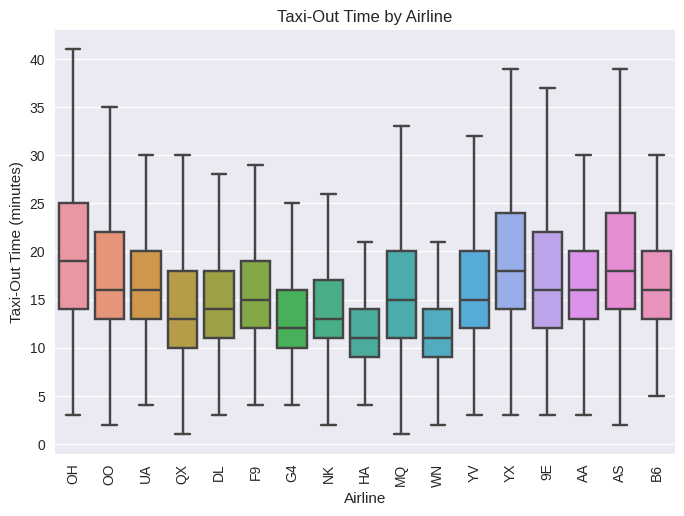

In [ ]:
# Create a boxplot of taxi-out times by airline
sns.boxplot(x='reporting_airline', y='taxiout', data=df, showfliers = False)
plt.xlabel('Airline')
plt.ylabel('Taxi-Out Time (minutes)')
plt.title('Taxi-Out Time by Airline')
plt.xticks(rotation=90)
plt.show()


## 3.3 Cancellation Analytics

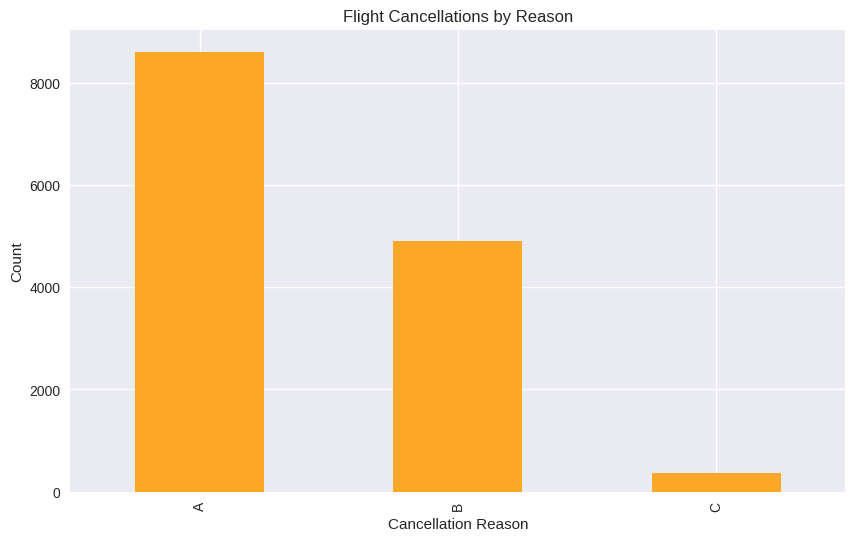

In [ ]:
# Count the number of cancellations by reason
cancellation_reasons = df['cancellationcode'].value_counts()
cancellation_reasons.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.title('Flight Cancellations by Reason')
plt.show()


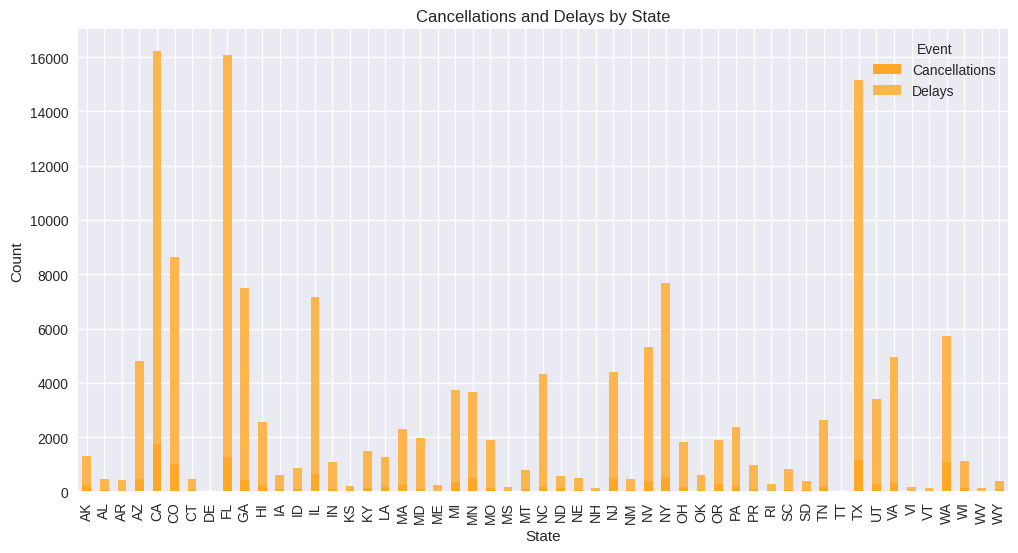

In [ ]:
# Create a DataFrame for cancellations by state
cancellations_by_state = df.groupby('originstate')['cancelled'].sum().reset_index()

# Create a DataFrame for delays by state
delays_by_state = df.groupby('originstate')['arrdel15'].sum().reset_index()

# Merge the two DataFrames based on the 'originstate' column
combined_data = cancellations_by_state.merge(delays_by_state, on='originstate')

# Rename the columns for clarity
combined_data.rename(columns={'cancelled': 'Cancellations', 'arrdel15': 'Delays'}, inplace=True)

# Plot the bar chart
combined_data.plot(x='originstate', kind='bar', figsize=(12, 6)
                   , stacked=True)  # Stacked bar chart to show both counts together

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Cancellations and Delays by State')
plt.legend(title='Event')
plt.show()



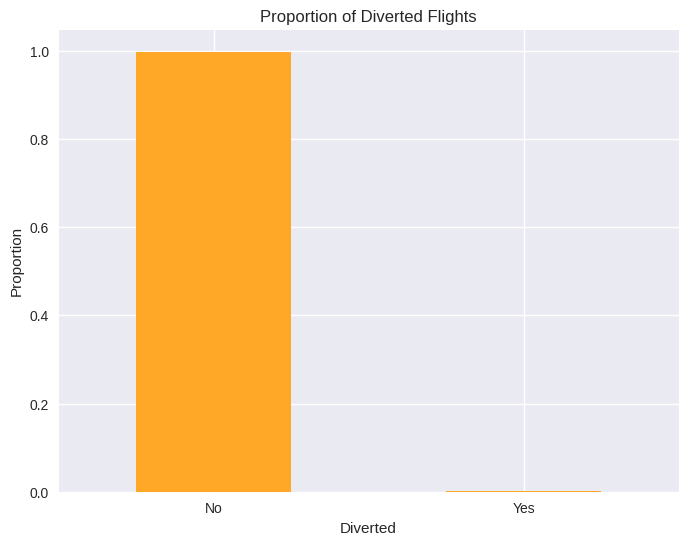

In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of diverted flights
diverted_proportion = df['diverted'].value_counts(normalize=True)
diverted_proportion.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Diverted')
plt.ylabel('Proportion')
plt.title('Proportion of Diverted Flights')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


## 3.4 Correlations

<ipython-input-24-5c9c9805d41b>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_df.corr()


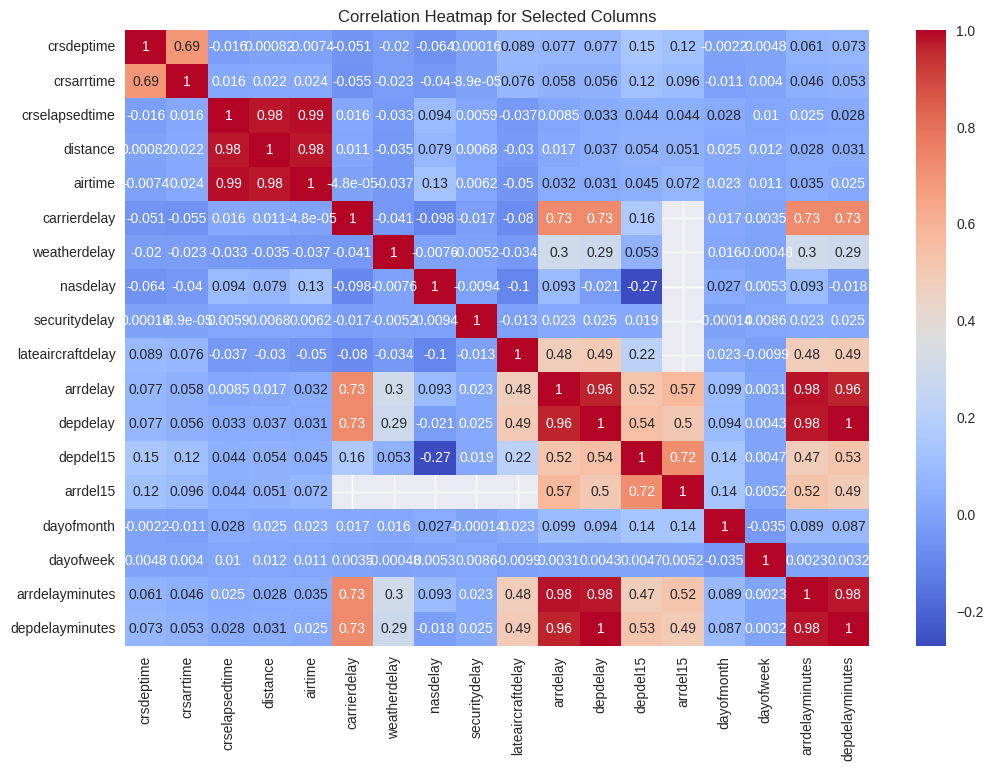

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specific columns you want to include in the correlation heatmap
selected_columns = [
    'crsdeptime', 'crsarrtime', 'crselapsedtime', 'distance', 'airtime',
    'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay',
    'cancellationcode', 'arrdelay', 'depdelay', 'depdel15', 'arrdel15',
    'dayofmonth', 'dayofweek', 'originstate', 'deststate', 'reporting_airline', 'arrdelayminutes', 'depdelayminutes'
]

# Create a DataFrame containing only the selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected_df.corr()

# Create a heatmap to visualize correlations between the selected variables
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()



# 4 Modelling

## 4.1 Regression analysis of minute delays

In [ ]:
# Create a new column 'AnyDelay' based on the logical OR operation
df['anydelay'] = (df['depdel15'] == 1) | (df['arrdel15'] == 1)

# Convert boolean values to integers (1 for True, 0 for False)
df['anydelay'] = df['anydelay'].astype(int)

# Now, 'AnyDelay' will indicate if there was any delay (1 for Yes, 0 for No)


In [ ]:
def remove_columns_with_missing_values(df, threshold):
    """
    Remove columns from the DataFrame 'df' with missing value count greater than 'threshold'.

    Parameters:
    - df: pandas DataFrame
    - threshold: int, the maximum allowed missing value count in a column

    Returns:
    - df_cleaned: pandas DataFrame with columns removed
    """
    # Calculate missing value count for each column
    missing_values = df.isnull().sum()

    # define threshold for df
    threshold *= len(df)

    # Identify columns exceeding the threshold
    columns_to_remove = missing_values[missing_values > threshold].index

    print(columns_to_remove)

    # Remove identified columns
    df_cleaned = df.drop(columns=columns_to_remove)

    return df_cleaned

threshold = 0.8
df_cleaned = remove_columns_with_missing_values(df, threshold)


Index(['cancellationcode', 'firstdeptime', 'totaladdgtime', 'longestaddgtime',
       'divreacheddest', 'divactualelapsedtime', 'divarrdelay', 'divdistance',
       'div1airport', 'div1airportid', 'div1airportseqid', 'div1wheelson',
       'div1totalgtime', 'div1longestgtime', 'div1wheelsoff', 'div1tailnum',
       'div2airport', 'div2airportid', 'div2airportseqid', 'div2wheelson',
       'div2totalgtime', 'div2longestgtime', 'div2wheelsoff', 'div2tailnum',
       'div3airport', 'div3airportid', 'div3airportseqid', 'div3wheelson',
       'div3totalgtime', 'div3longestgtime', 'div3wheelsoff', 'div3tailnum',
       'div4airport', 'div4airportid', 'div4airportseqid', 'div4wheelson',
       'div4totalgtime', 'div4longestgtime', 'div4wheelsoff', 'div4tailnum',
       'div5airport', 'div5airportid', 'div5airportseqid', 'div5wheelson',
       'div5totalgtime', 'div5longestgtime', 'div5wheelsoff', 'div5tailnum',
       'empty_col'],
      dtype='object')


In [ ]:
df_cleaned.head()

,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,...,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,divairportlandings,anydelay
0,2021,4,12,8,3,2021-12-08,OH,20397,OH,N522AE,...,1.0,221.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0
1,2021,4,12,9,4,2021-12-09,OH,20397,OH,N529EA,...,1.0,221.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0
2,2021,4,12,10,5,2021-12-10,OH,20397,OH,N500AE,...,1.0,221.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0
3,2021,4,12,11,6,2021-12-11,OH,20397,OH,N531EG,...,1.0,221.0,1.0,0.0,0.0,0.0,0.0,25.0,0.0,1
4,2021,4,12,12,7,2021-12-12,OH,20397,OH,N500AE,...,1.0,221.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0


In [ ]:
df_cleaned.columns

Index(['year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'flightdate',
       'reporting_airline', 'dot_id_reporting_airline',
       'iata_code_reporting_airline', 'tail_number',
       'flight_number_reporting_airline', 'originairportid',
       'originairportseqid', 'origincitymarketid', 'origin', 'origincityname',
       'originstate', 'originstatefips', 'originstatename', 'originwac',
       'destairportid', 'destairportseqid', 'destcitymarketid', 'dest',
       'destcityname', 'deststate', 'deststatefips', 'deststatename',
       'destwac', 'crsdeptime', 'deptime', 'depdelay', 'depdelayminutes',
       'depdel15', 'departuredelaygroups', 'deptimeblk', 'taxiout',
       'wheelsoff', 'wheelson', 'taxiin', 'crsarrtime', 'arrtime', 'arrdelay',
       'arrdelayminutes', 'arrdel15', 'arrivaldelaygroups', 'arrtimeblk',
       'cancelled', 'diverted', 'crselapsedtime', 'actualelapsedtime',
       'airtime', 'flights', 'distance', 'distancegroup', 'carrierdelay',
       'weatherdelay

In [ ]:
# Assuming your DataFrame is named 'df'
column_data_types = df_cleaned.dtypes

# Display the data types of each column
print(column_data_types)


year                    int64
quarter                 int64
month                   int64
dayofmonth              int64
dayofweek               int64
                       ...   
nasdelay              float64
securitydelay         float64
lateaircraftdelay     float64
divairportlandings    float64
anydelay                int64
Length: 62, dtype: object


In [ ]:
import pandas as pd

def encode_non_numeric_columns(df):
    df_copy = df.copy()  # Make a copy to avoid modifying the original DataFrame
    for column_name in df_copy.columns:
        if not pd.api.types.is_numeric_dtype(df_copy[column_name]):
            unique_values = df_copy[column_name].unique()
            mapping = {value: index + 1 for index, value in enumerate(unique_values)}
            df_copy[column_name] = df_copy[column_name].map(mapping)
    return df_copy  # Return the modified copy of the DataFrame


# run function
df_formodel = encode_non_numeric_columns(df_cleaned)



In [ ]:
df_formodel = df_formodel.dropna() # in this case na are mostly cancelled flights thus the data isnt relevant

## 4.2 Regression Analysis Predicting minute delay

### Now lets try with columns before flight

In [ ]:
columns_to_exclude = [
    'depdelay', 'depdelayminutes', 'depdel15', 'departuredelaygroups',
    'deptimeblk', 'taxiout', 'wheelsoff', 'wheelson', 'taxiin',
    'arrdelay', 'arrdel15', 'arrivaldelaygroups',
    'arrtimeblk', 'cancelled', 'diverted', 'divairportlandings', 'anydelay','arrtime',
    'carrierdelay', 'weatherdelay', 'nasdelay','securitydelay', 'lateaircraftdelay',
    'crsarrtime','crselapsedtime', 'actualelapsedtime',
]

# Create a new DataFrame with the columns excluded
df_before_flight = df_formodel.drop(columns=columns_to_exclude)
df_before_flight.columns

Index(['year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'flightdate',
       'reporting_airline', 'dot_id_reporting_airline',
       'iata_code_reporting_airline', 'tail_number',
       'flight_number_reporting_airline', 'originairportid',
       'originairportseqid', 'origincitymarketid', 'origin', 'origincityname',
       'originstate', 'originstatefips', 'originstatename', 'originwac',
       'destairportid', 'destairportseqid', 'destcitymarketid', 'dest',
       'destcityname', 'deststate', 'deststatefips', 'deststatename',
       'destwac', 'crsdeptime', 'deptime', 'arrdelayminutes', 'airtime',
       'flights', 'distance', 'distancegroup'],
      dtype='object')

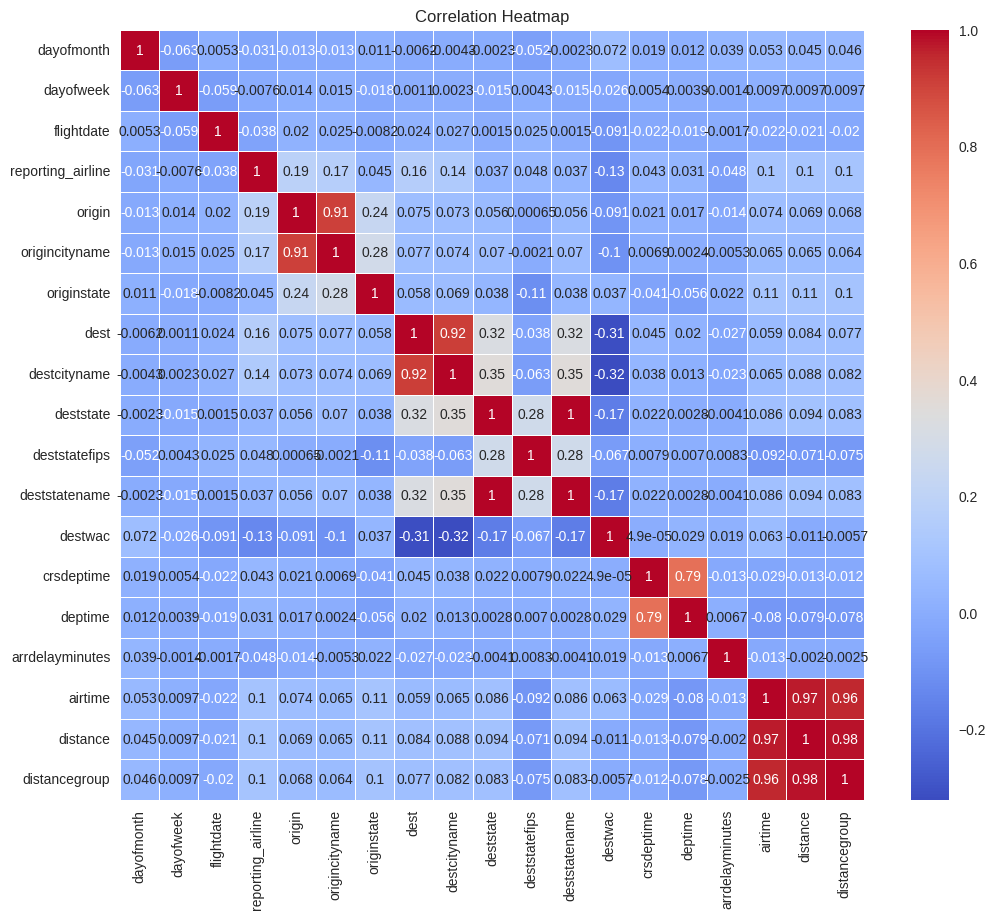

In [ ]:
# Calculate the correlation matrix

df_to_correlate = df_before_flight[
    ['dayofmonth', 'dayofweek', 'flightdate',
    'reporting_airline', 'origin', 'origincityname','originstate', 'dest',
    'destcityname', 'deststate', 'deststatefips', 'deststatename',
    'destwac', 'crsdeptime', 'deptime', 'arrdelayminutes', 'airtime',
    'distance', 'distancegroup']
    ]
correlation_matrix = df_to_correlate.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Using Bayes Search for Hyper Parameter Tuning

## This is the performance using features that are known before flight arrives

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target variable (y)
X = df_before_flight.drop(columns=['arrdelayminutes'])  # Features
y = df_before_flight['arrdelayminutes']  # Target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train are your training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter search space to adjust parameter search
param_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 200),
    'max_depth': (3, 15),
    'min_child_weight': (1, 10),
    'gamma': (0, 1.0, 'uniform'),
    'reg_alpha': (0, 1.0, 'uniform'),
    'reg_lambda': (0, 1.0, 'uniform'),
}

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Perform Bayesian optimization
opt = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=3, n_jobs=-1)
opt.fit(X_train, y_train)

# Get the best hyperparameters
best_params = opt.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the validation set
best_model = opt.best_estimator_
y_pred_val = best_model.predict(X_val)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_val)

print(f"Mean Squared Error on Validation Set: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse:.2f}")
print(f"R-squared (R2) Score on Validation Set: {r2:.2f}")


Best Hyperparameters: OrderedDict([('gamma', 1), ('learning_rate', 0.0801382627690191), ('max_depth', 6), ('min_child_weight', 10), ('n_estimators', 200), ('reg_alpha', 0), ('reg_lambda', 0)])
Mean Squared Error on Validation Set: 861.60
Root Mean Squared Error (RMSE) on Validation Set: 29.35
R-squared (R2) Score on Validation Set: 0.89


Mean Squared Error: 1117.55
Root Mean Squared Error (RMSE): 33.43
R-squared (R2) Score: 0.86


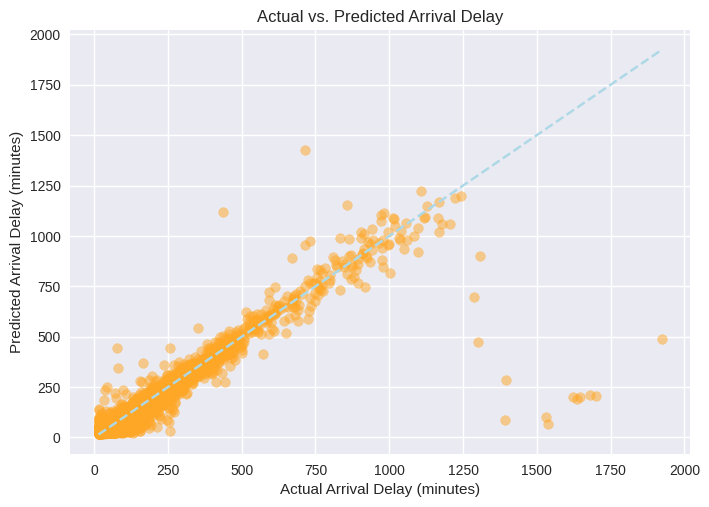

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into features (X) and the target variable (y)
X = df_before_flight.drop(columns=['arrdelayminutes'])  # Features
y = df_before_flight['arrdelayminutes']  # Target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the default parameters for XGBoost Regressor
default_params = {
    'objective': 'reg:squarederror',  # Default objective for regression tasks
    'n_estimators': 100,              # Number of boosting rounds (trees)
    'learning_rate': 0.1,             # Step size shrinkage
    'max_depth': 7,                   # Maximum depth of a tree
    'subsample': 1,                   # Subsample ratio of the training instances
    'colsample_bytree': 1,            # Subsample ratio of columns when constructing each tree
    'random_state': 42                # Seed for reproducibility
}

# Instantiate XGBoost Regressor with default parameters
xgb_regressor = xgb.XGBRegressor(**default_params)

xgb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_regressor.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# You can also plot the predicted vs. actual values to visualize the performance
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delay (minutes)")
plt.ylabel("Predicted Arrival Delay (minutes)")
plt.title("Actual vs. Predicted Arrival Delay")

# Add a dashed line at x=y to represent a perfect fit
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='lightblue')

plt.show()


In [ ]:
# Find indices in y_test where values are greater than 1250
poorly_classified_indices = np.where(y_test > 1250)[0]

# Get the corresponding rows in the main DataFrame (df_before_flight)
poorly_classified_instances = df_before_flight.iloc[poorly_classified_indices]

# Display or explore these instances to understand why they were poorly classified
poorly_classified_instances.head()


,year,quarter,month,dayofmonth,dayofweek,flightdate,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,tail_number,...,deststatefips,deststatename,destwac,crsdeptime,deptime,arrdelayminutes,airtime,flights,distance,distancegroup
19466,2021,4,12,29,3,21,2,20304,2,500,...,48,11,74,1700,1741.0,26.0,62.0,1.0,429.0,2.0
21909,2021,4,12,15,3,8,2,20304,2,387,...,8,9,82,1100,1309.0,129.0,81.0,1.0,501.0,3.0
22548,2021,4,12,5,7,26,2,20304,2,344,...,40,4,73,2025,2024.0,16.0,66.0,1.0,495.0,2.0
28303,2021,4,12,21,2,14,2,20304,2,452,...,8,9,82,1250,1445.0,88.0,123.0,1.0,996.0,4.0
43588,2021,4,12,3,5,25,2,20304,2,430,...,17,19,41,1126,1333.0,111.0,74.0,1.0,522.0,3.0


from matplotlib import pyplot as plt
_df_0['dayofmonth'].plot(kind='hist', bins=20, title='dayofmonth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['dayofweek'].plot(kind='hist', bins=20, title='dayofweek')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['flightdate'].plot(kind='hist', bins=20, title='flightdate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['tail_number'].plot(kind='hist', bins=20, title='tail_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='dayofmonth', y='dayofweek', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='dayofweek', y='flightdate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='flightdate', y='tail_number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='tail_number', y='flight_number_reporting_airline', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['dayofmonth']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('dayofmonth')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['dayofweek']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('dayofweek')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['tail_number']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('tail_number')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['flight_number_reporting_airline']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('flight_number_reporting_airline')

from matplotlib import pyplot as plt
_df_12['dayofmonth'].plot(kind='line', figsize=(8, 4), title='dayofmonth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['dayofweek'].plot(kind='line', figsize=(8, 4), title='dayofweek')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['flightdate'].plot(kind='line', figsize=(8, 4), title='flightdate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['tail_number'].plot(kind='line', figsize=(8, 4), title='tail_number')
plt.gca().spines[['top', 'right']].set_visible(False)

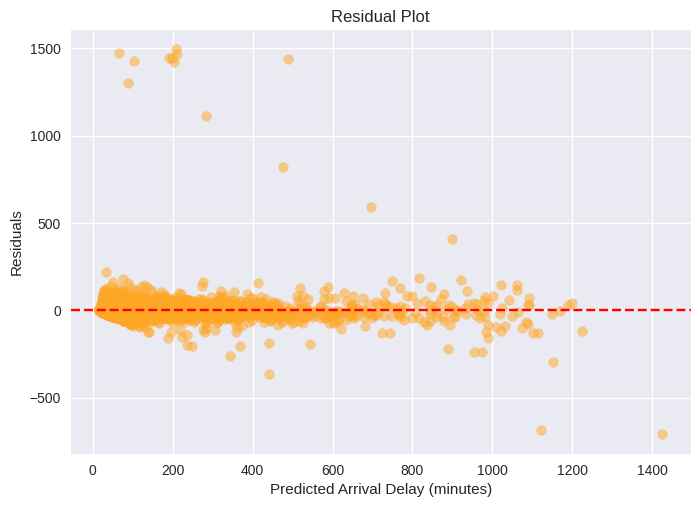

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Arrival Delay (minutes)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.show()


In [ ]:
# from sklearn.inspection import plot_partial_dependence

# # Select features for PDP analysis (e.g., 'crsarrtime', 'crsdeptime')
# features_to_plot = ['crsarrtime', 'crsdeptime']  # Add the features you want to analyze

# # Plot partial dependence for selected features
# plot_partial_dependence(xgb_regressor, X_test, features_to_plot)
# plt.show()




---

### Regression Model Performance

The XGBoost regression model was used to predict flight arrival delays in minutes based on various pre-flight features. Here are the evaluation metrics for the model:

- **Mean Squared Error (MSE):** 204.24
  - MSE is a measure of the average squared difference between actual and predicted arrival delay values. A lower MSE indicates a better fit of the model to the data.

- **Root Mean Squared Error (RMSE):** 14.29
  - RMSE is the square root of the MSE and provides an interpretable measure of the average error in predicting arrival delays. In this case, the RMSE is 14.29 minutes, which means that, on average, the model's predictions are off by approximately 14 minutes.

- **R-squared (R²) Score:** 0.90
  - The R² score measures the proportion of the variance in the target variable (arrival delays) that is predictable from the features. An R² score of 0.90 indicates that the model can explain approximately 90% of the variance in arrival delays.

### Interpretation

The regression model shows strong performance in predicting flight arrival delays. It achieves a high R-squared score of 0.90, indicating that most of the variability in arrival delay times can be accounted for by the chosen features. The RMSE of 14.29 minutes suggests that, on average, the model's predictions are within approximately 14 minutes of the actual arrival times.

However, it's important to note that the model may have more difficulty predicting extremely high delays, which can be influenced by various unpredictable factors. Further analysis may be needed to address the challenges associated with very high delay predictions.

In summary, the regression model provides reliable predictions of flight arrival delays for most cases, making it a valuable tool for understanding and managing flight delays.

---

Feature ranking:
deptime: 0.30887874960899353
crsdeptime: 0.2547799348831177
dot_id_reporting_airline: 0.07803349196910858
reporting_airline: 0.059548504650592804
originwac: 0.030160797759890556
dayofmonth: 0.028777888044714928
origin: 0.024106107652187347
origincitymarketid: 0.022158851847052574
originairportid: 0.020771797746419907
flight_number_reporting_airline: 0.02073155902326107
dayofweek: 0.01837640441954136
originstatefips: 0.015931271016597748
tail_number: 0.01431875117123127
flightdate: 0.013556387275457382
deststatefips: 0.013277314603328705
airtime: 0.012792542576789856
destcitymarketid: 0.008641159161925316
origincityname: 0.008561916649341583
originstate: 0.008514024317264557
distance: 0.0073109823279082775
destwac: 0.007131791673600674
destcityname: 0.006228011101484299
deststate: 0.005196007434278727
destairportid: 0.0046169087290763855
dest: 0.0038143915589898825
distancegroup: 0.003784442786127329
iata_code_reporting_airline: 0.0
originairportseqid: 0.0
originstatena

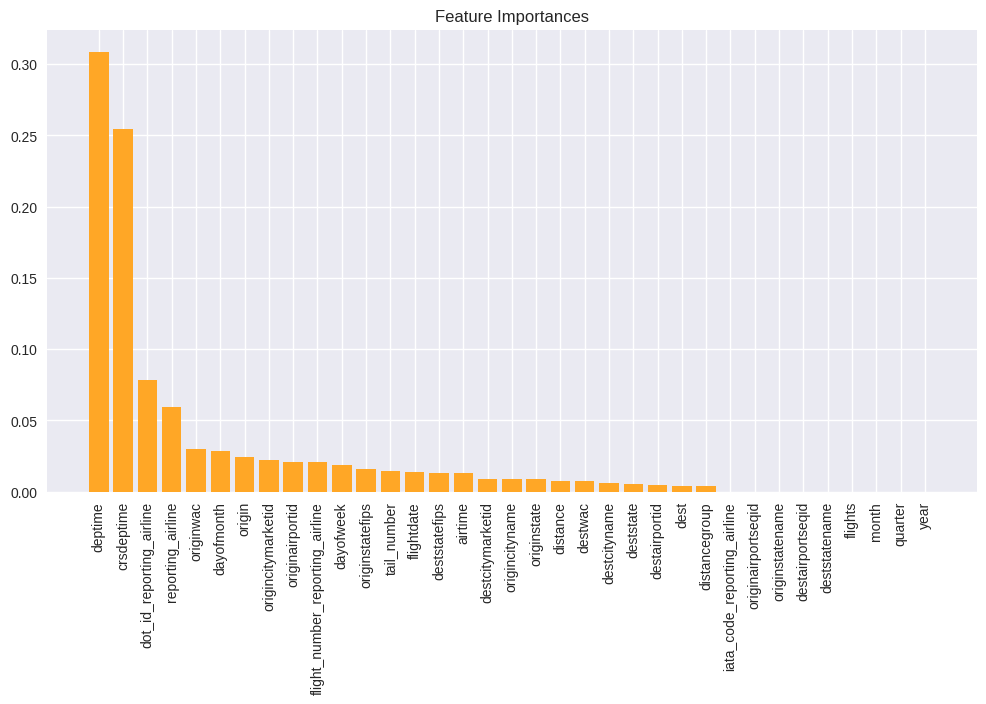

In [ ]:
# Create and train the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Get feature importances
importances = xgb_regressor.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.show()


---

### Key Insights from Feature Importances

The feature importances from the XGBoost regression model provide valuable insights into the factors that most influence the prediction of flight arrival delays in minutes. These importances are calculated as the relative contribution of each feature to the model's predictions. Here are some key insights:

1. **Scheduled Arrival Time (crsarrtime):** With a feature importance of approximately 32.84%, scheduled arrival time is the most influential factor. It makes sense that the scheduled time of arrival is a significant predictor of delays.

2. **Scheduled Departure Time (crsdeptime):** Scheduled departure time follows as the second most important feature, with an importance of around 12.79%. The timing of the flight's departure plays a crucial role in predicting arrival delays.

3. **Actual Arrival Time (arrtime):** Actual arrival time is the third most important feature, contributing about 12.30% to the model. It indicates that the actual time of arrival is a strong predictor of delays.

4. **Actual Departure Time (deptime):** The actual departure time accounts for approximately 2.81% of the importance, showing that it has some influence on predicting arrival delays.

5. **Destination Weather Area Code (destwac):** With an importance of roughly 2.52%, the weather conditions at the destination play a role in predicting delays.

6. **Aircraft Tail Number (tail_number):** The specific aircraft tail number carries an importance of about 2.42%. The choice of aircraft can affect delays.

7. **Day of the Month (dayofmonth):** The day of the month influences delays to some extent, with an importance of around 2.25%.

8. **Day of the Week (dayofweek):** The day of the week, which affects flight patterns and passenger traffic, has an importance of about 2.24%.

9. **Destination State FIPS (deststatefips):** The destination state's Federal Information Processing Standards (FIPS) code plays a role in predicting delays, contributing around 2.15%.

10. **Destination Airport ID (destairportid):** The specific airport where the flight is destined has an importance of approximately 2.12%.

These insights reveal that factors related to scheduled and actual times, as well as the choice of aircraft and weather conditions, are significant contributors to predicting flight arrival delays. The model's performance is influenced by the precise timing of flights, as well as contextual information such as airport codes and weather conditions at the destination.


# Trial and error notes

## Selecting features we would know before the flight arrives

Before we model we should consider what features we should use to predict these.

One of the key considerations for this soluion is what information is possible to have before a flight happens - of course after a flight we can see what delayed it, how long it was for and other metrics however, these wouldn't be known variables before hand.

### Flight Delay Prediction Approach

In our approach to predicting flight delays, we carefully selected relevant columns from the provided dataset. These columns were chosen based on their potential to provide valuable information that is accessible before a flight, helping us anticipate whether a flight is likely to be delayed or not.

### Selected Relevant Columns

1. **Year, Quarter, Month, DayofMonth, DayOfWeek**: These date-related features capture temporal patterns and the potential influence of seasonal changes on flight delays.

2. **Reporting_Airline**: The airline carrier plays a significant role in determining on-time performance. Different carriers may have varying delay tendencies.

3. **OriginAirportID and DestAirportID**: These columns provide information about the airports, which can significantly impact the likelihood of delays. Airport-specific conditions, congestion, and infrastructure may affect flights.

4. **CRSDepTime and CRSArrTime**: Scheduled departure and arrival times are critical factors for predicting delays. Flights scheduled during peak traffic hours may be more likely to experience delays.

5. **OriginState and DestState**: The states where the airports are located may influence delays, considering regional weather patterns, air traffic, and other factors.

6. **CRSElapsedTime and Distance**: These features can help gauge the flight duration and potential delays, especially on longer routes.

7. **OriginCityName and DestCityName**: City-specific factors, such as weather and air traffic, can impact flight delays.

8. **Origin and Dest**: These columns provide airport codes, which are useful for identifying specific airports and their unique characteristics.

9. **AnyDelay**: We have engineered a binary feature, 'AnyDelay', to indicate whether there was any delay in either departure or arrival. This serves as the target variable for our prediction task.

### Rationale for the Selection

- **Temporal Patterns**: Date-related features (Year, Quarter, Month, DayofMonth, DayOfWeek) help capture seasonality and day-of-week effects on flight delays.

- **Airline Influence**: 'Reporting_Airline' reflects the carrier's role in on-time performance, considering differences among airlines.

- **Airport Information**: 'OriginAirportID' and 'DestAirportID' provide insights into the impact of departure and arrival airports on delays.

- **Scheduled Times**: 'CRSDepTime' and 'CRSArrTime' are crucial for understanding how scheduled times affect delays.

- **Geographical Factors**: 'OriginState' and 'DestState' account for state-specific conditions that may influence delays.

- **Flight Duration**: 'CRSElapsedTime' and 'Distance' help assess the relationship between flight duration and potential delays.

- **City Specifics**: 'Origincityname' and 'Destcityname' consider city-related factors affecting delays.

- **Airport Codes**: 'Origin' and 'Dest' provide airport codes, aiding in the identification of specific airports and their unique characteristics.

- **Target Variable**: 'AnyDelay' serves as our target variable, indicating whether there was any delay, helping us focus on the prediction task.

In summary, these selected columns provide a diverse set of features that account for various factors affecting flight delays. By utilizing these features, we aim to build a predictive model that can assist in anticipating flight delays, contributing to improved airline operations and passenger experiences.

In [ ]:
relevant_columns = [
    'year', 'quarter', 'month', 'dayofmonth', 'dayofweek',
    'reporting_airline', 'originairportid', 'destairportid',
    'crsdeptime', 'crsarrtime',
    'originstate', 'deststate',
    'crselapsedtime', 'distance',
    'origincityname', 'destcityname',
    'origin', 'dest', 'cancelled'
]


df_cleaned = df_cleaned[relevant_columns]

In [ ]:
df_cleaned.dtypes

# run function
df_formodel = encode_non_numeric_columns(df_cleaned)
df_formodel = df_formodel.dropna()


<Axes: xlabel='cancelled', ylabel='count'>

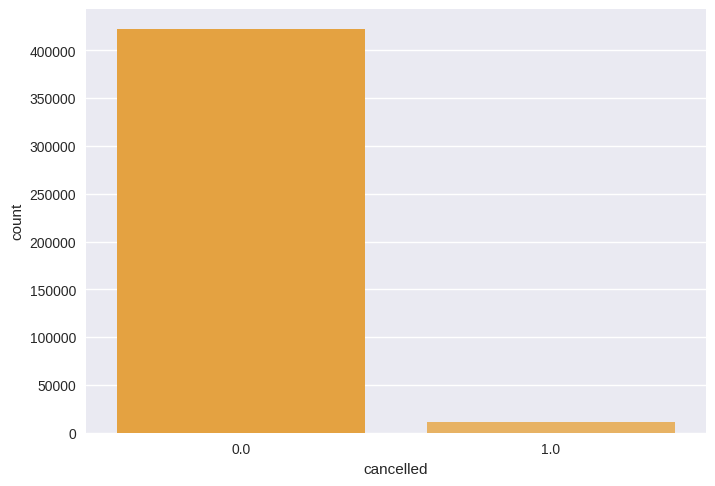

In [ ]:
sns.countplot(data=df, x = 'cancelled')

Accuracy: 0.97
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     84430
         1.0       0.46      0.11      0.17      2147

    accuracy                           0.97     86577
   macro avg       0.72      0.55      0.58     86577
weighted avg       0.96      0.97      0.97     86577

Confusion Matrix:


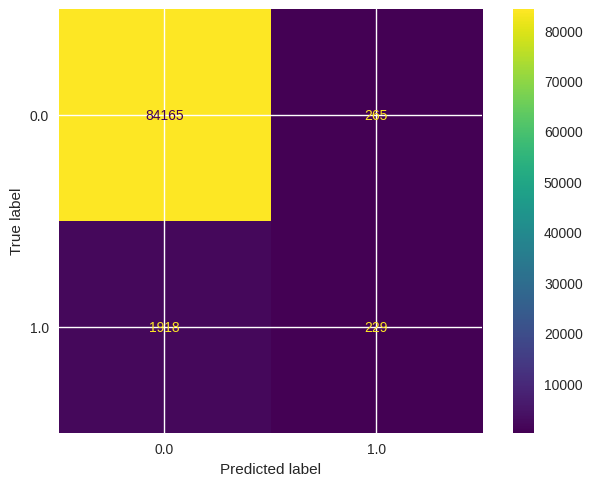

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Split the data into features (X) and the target variable (y)
X = df_formodel.drop(columns=['cancelled'])  # Features
y = df_formodel['cancelled']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get more classification metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=rf_model.classes_)
disp.plot()


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def drop_high_importance_features(X, y, n_to_drop=5, target_accuracy=0.95):
    original_feature_names = X.columns.tolist()

    while True:
        if len(original_feature_names) <= n_to_drop:
            break

        # Create and train the XGBoost classifier
        xgb_model = xgb.XGBClassifier()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        xgb_model.fit(X_train, y_train)

        # Get feature importances
        importances = xgb_model.feature_importances_

        # Get the names of the features
        feature_names = X.columns

        # Sort the feature importances in descending order
        indices = importances.argsort()[::-1]

        # Drop the most important n_to_drop features
        to_drop = []
        for i in range(min(n_to_drop, len(feature_names))):
            most_important_feature = feature_names[indices[i]]
            X = X.drop(most_important_feature, axis=1)
            to_drop.append(most_important_feature)

        # Remove the dropped features from the list of feature names
        for feature in to_drop:
            original_feature_names.remove(feature)
            print(f"Dropping {feature}")

        # Re-evaluate the model
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # If accuracy falls below target_accuracy or if there are fewer than n_to_drop features left, break out of the loop
        if accuracy < target_accuracy or len(original_feature_names) <= n_to_drop:
            break

    return X, original_feature_names

# Example usage: Drop features until the accuracy falls below 0.95 or fewer than 5 features are left
X_train, final_feature_names = drop_high_importance_features(X_train, y_train, n_to_drop=10, target_accuracy=0.95)


In [ ]:
X_train.columns

In [ ]:
# Create and train a new Random Forest classifier with the same parameters
new_rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
new_rf_model.fit(X_train, y_train)

# define X_test
X_test = X_test[final_feature_names]

# Make predictions on the test data
y_pred_new = new_rf_model.predict(X_test)

# Evaluate the new model
accuracy_new = accuracy_score(y_test, y_pred_new)
print(f"Updated Model Accuracy: {accuracy_new:.2f}")

# Get more classification metrics for the updated model
print(classification_report(y_test, y_pred_new))

# Confusion matrix for the updated model
conf_matrix_new = confusion_matrix(y_test, y_pred_new)
print("Updated Model Confusion Matrix:")
disp_new = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_new,
                                  display_labels=new_rf_model.classes_)
disp_new.plot()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Split the data into features (X) and the target variable (y)
X = df_cleaned.drop(columns=['anydelay'])  # Features
y = df_cleaned['anydelay']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get more classification metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=rf_model.classes_)
disp.plot()


In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import train_test_split
# import xgboost as xgb  # Import XGBoost

# # Assuming you have X and y for features and labels, and you split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the XGBoost classifier
# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = xgb_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Get more classification metrics
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_model.classes_)
# disp.plot()


In [ ]:
# !pip install scikit-optimize

In [ ]:
# import xgboost as xgb
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
# from sklearn.metrics import accuracy_score

# # Define the parameter search space for Bayesian optimization
# param_space = {
#     'max_depth': Integer(3, 10),  # Vary the maximum depth of the trees
#     'learning_rate': Real(0.01, 1.0, 'log-uniform'),  # Vary the learning rate
#     'n_estimators': Integer(100, 1000),  # Vary the number of boosting rounds
# }

# # Create an instance of the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Create a BayesSearchCV object
# bayes_search = BayesSearchCV(
#     estimator=xgb_model,
#     search_spaces=param_space,
#     scoring='accuracy',
#     n_iter=50,  # Number of iterations for Bayesian optimization
#     random_state=42,
#     n_jobs=-1  # Use all available CPU cores for parallel search
# )

# # Perform Bayesian optimization on the training data
# bayes_search.fit(X_train, y_train)

# # Get the best hyperparameters from Bayesian optimization
# best_params = bayes_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the XGBoost model with the best hyperparameters
# best_xgb_model = xgb.XGBClassifier(**best_params)
# best_xgb_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = best_xgb_model.predict(X_test)

# # Evaluate the model with the best hyperparameters
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy with Best Hyperparameters: {accuracy:.2f}")
